<a href="https://colab.research.google.com/github/kanacb/pythonmasterclass/blob/main/Lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algebra

## Linear Algebra - Matrices

Learning linear algebra helps us solve real world problems. We begin with a simple 2 variable problem problem and slowing work our way up to much more complex solutions.

What is linear algebra.

## Solving a 2 Variable problem will require 2 equations
1. y = 2x + 5 # is a linear algebraic equation
Simplified => y - 2x = 5
2. y - 2x = 5

With 2 linear equations we can solve for x and y.

Lets add another equation:

2. y - 3x = 4 

These 2 equations can be represented as a Matrix. See below.


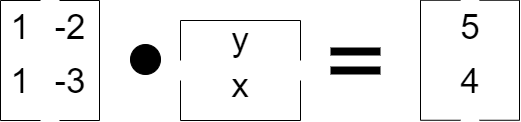

In [2]:
import numpy as np
A = np.array([[1, -2],[1, -3]])
B = np.array([5, 4])
x = np.linalg.solve(A, B)
x

array([7., 1.])

Lets check the results.

y = 7 and x = 1

```
x = 1
y = 2*x + 5
y = 7

1. y - 3x = 4
2. y - 4 = 3x
3. 3x = y - 4
4  x = (1/3)*(y-4)

x = (1/3)*(y - 4)
x = 1 # proven
```



In [3]:
x = 1
y = 2*x + 5
y

7

In [4]:
x = (1/3)*(y - 4)
x

1.0

## Lets plot these equations



```
y = 2x + 5
y = 4 + 3x
```



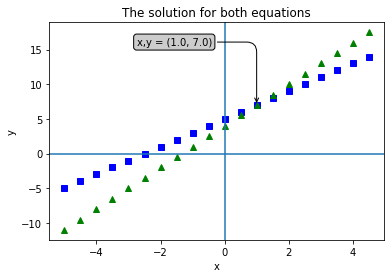

In [5]:
import matplotlib.pyplot as plt
offset = 60
xdata, ydata = 1 , 7
x = np.arange(-5., 5., 0.5)
y1 = 2*x+5
y2 = 4+3*x
fig, ax = plt.subplots()
ax.plot(x, y1, 'bs', x, y2 ,'g^')
bbox = dict(boxstyle ="round", fc ="0.8")
arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10")
ax.annotate('x,y = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext =(-2 * offset, offset),
            textcoords ='offset points',
            bbox = bbox, arrowprops = arrowprops)
ax.axhline(y=0)
ax.set_ylabel('y')
ax.axvline(x=0)
ax.set_xlabel('x')
plt.title("The solution for both equations")
plt.show()

# Linear Systems

For example, let solve these 3 equations.

\begin{alignedat}{7}2x&&\;+\;&&y&&\;-\;&&z&&\;=\;&&8\\-3x&&\;-\;&&y&&\;+\;&&2z&&\;=\;&&-11\\-2x&&\;+\;&&y&&\;+\;&&2z&&\;=\;&&-3\end{alignedat}

be a linear system.


**The matrix**

\begin{bmatrix}\begin{array}{rrr}2&1&-1\\-3&-1&2\\-2&1&2\end{array}\end{bmatrix}
and its right member vector

\begin{bmatrix}8\\-11\\-3\end{bmatrix}

Find the solution?

\begin{bmatrix}x\\y\\z\end{bmatrix}


In [6]:
A = np.array([[2, 1, -1], [-3, -1, 2], [-2 , 1, 2]])
B = np.array([8, -11,-3])
sol = np.linalg.solve(A, B)
sol

array([ 2.,  3., -1.])

\begin{alignedat}{7}-2x&&\;+\;&&8&&\;+\;&&z&&\;=\;&&y\\-3x&&\;+\;&&11&&\;+\;&&2z&&\;=\;&&y\\2x&&\;-\;&&3&&\;-\;&&2z&&\;=\;&&y\end{alignedat}

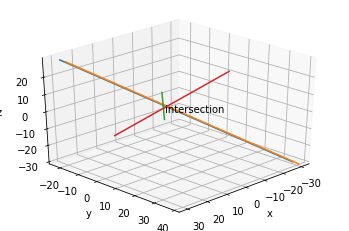

In [7]:
xsol, ysol, zsol = sol[0],sol[1],sol[2],
x = np.arange(-30., 30., 0.2)
z = np.arange(-30., 30., 0.2)
y1 = -2*x + 8 + z
y2 = -3*x + 11 + 2*z
y3 = 2*x - 3 - 2*z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y1, z, x, y2, z,x, y3, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,45)
ax.text(xsol, ysol, zsol, "intersection")
plt.show()

# Non-Linear Systems
Find the intersection of the given circle and the given line by substitution.
\begin{alignedat}{7}x^2&&\;+\;&&y^2&&\;=\;&&5\\y&&\;=\;&&3x&&\;-\;&&5&&\;\end{alignedat}

In [8]:
import sympy as sym
sym.init_printing()
x,y = sym.symbols('x,y')
eq1 = sym.Eq(x**2+y**2,5)
eq2 = sym.Eq(3*x-5,y)
sol = sym.solve([eq1,eq2],(x,y))
sol

Plotting the equations

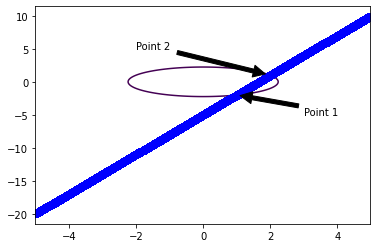

In [9]:
import matplotlib.pyplot as plt
delta = 0.025
xNL, yNL = np.meshgrid(
    np.arange(-5, 5, delta),
    np.arange(-5, 5, delta)
)
plt.plot(xNL,3*xNL-5,'bs')
plt.contour(xNL,yNL,xNL**2+yNL**2-5,[0])
plt.annotate('Point 1', xy=(1, -2), xytext=(3, -5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('Point 2', xy=(2, 1), xytext=(-2, 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

# Assignments
1. Find the Solution for?
\begin{alignedat}{7}5x&&\;+\;&&5y^2&&\;=\;&&-1\\x^2&&\;-\;&&5x&&\;=\;&&10\end{alignedat}
2. Plot the equations in the 3D?
3. Add an annotation to indicate the intersection?